In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Dataset/full.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [6]:
#selecting important features
#Pclass : passenger class
#age : age
#sex : sex
#sinsp : number of spouse
#parch  :number of parents and son


## Correlation testing
We will be testing the correlation between few different important features and concludes few of the key points

### Testing correlation between age and survival

In [8]:
data['Survived'].corr(data['Age'])

-0.07722109457217755

### Testing correlation between sex and survival

In [13]:
#syntaxx is different because one the feature is string and other is integer
data['Sex'].str.get_dummies().corrwith(data['Survived']/data['Survived'].max())

female    0.543351
male     -0.543351
dtype: float64

In [16]:
data['Sex'].str.get_dummies()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1304,0,1
1305,1,0
1306,0,1
1307,0,1


### Correlation matrix

In [18]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.043806,0.024029,-0.039851
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.330473,-0.049798,-0.341829
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,0.896469,-0.421088,0.997294
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.343706,0.976244,-0.406132
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,0.064071,-0.248726,0.062120
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,0.000669,-0.122975,0.020035
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,-0.476789,0.187654,-0.552864
WikiId,-0.043806,-0.330473,0.896469,-0.343706,0.064071,0.000669,-0.476789,1.000000,-0.348818,0.899477
Age_wiki,0.024029,-0.049798,-0.421088,0.976244,-0.248726,-0.122975,0.187654,-0.348818,1.000000,-0.417871
Class,-0.039851,-0.341829,0.997294,-0.406132,0.062120,0.020035,-0.552864,0.899477,-0.417871,1.000000


<AxesSubplot:>

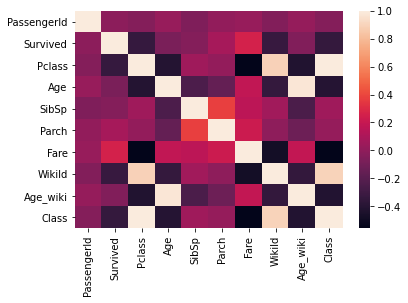

In [20]:
#Plotting correlation using heatmap
import seaborn as sns
sns.heatmap(data.corr())

## Data Cleaning

In [23]:
#since passengerID is just noise in this data thus we should remove it
data1 = data.drop(['PassengerId'],axis=1) 

In [25]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


0         male
1       female
2       female
3       female
4         male
         ...  
1304      male
1305    female
1306      male
1307      male
1308      male
Name: Sex, Length: 1309, dtype: object